          T           P        vf           vfg          vg           uf  \
0     0.010    0.006102  0.001000  2.065326e+02  206.533627     0.000000   
1     4.000    0.008116  0.001000  1.575305e+02  157.531546    16.770141   
2     5.000    0.008704  0.001000  1.473998e+02  147.400772    20.974982   
3     6.000    0.009331  0.001000  1.379966e+02  137.997612    25.179712   
4     8.000    0.010704  0.001000  1.211489e+02  121.149900    33.587684   
..      ...         ...       ...           ...         ...          ...   
69  370.000  210.174778  0.002217  2.746754e-03    0.004964  1844.870691   
70  371.000  212.710748  0.002285  2.425813e-03    0.004711  1863.649757   
71  372.000  215.280450  0.002376  2.047036e-03    0.004424  1886.671146   
72  373.000  217.886235  0.002520  1.546784e-03    0.004066  1918.677969   
73  374.136  220.890000  0.003256  1.824467e-09    0.003256  2044.659183   

            ufg           ug           hf          hfg           hg        sf  \
0   23

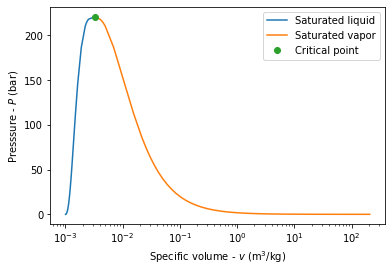

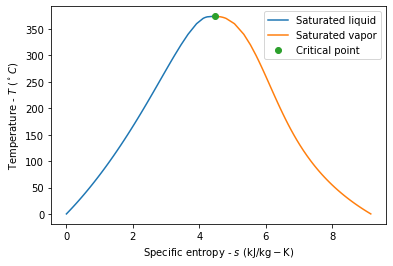

In [1]:
"""
This example generates a saturated steam table and plots the vapor dome. The
steam table corresponds to data typically found in thermodynamic text books
and uses the same customary units.

Requires: Cantera >= 2.5.0, matplotlib >= 2.0, pandas >= 1.1.0, numpy >= 1.12
"""

import cantera as ct
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

w = ct.Water()

# create colums
columns = ['T', 'P',
           'vf', 'vfg', 'vg',
           'uf', 'ufg', 'ug',
           'hf', 'hfg', 'hg',
           'sf', 'sfg', 'sg']

# temperatures correspond to Engineering Thermodynamics, Moran et al. (9th ed),
# Table A-2; additional data points are added close to the critical point;
# w.min_temp is equal to the triple point temperature
degc = np.hstack([np.array([w.min_temp - 273.15, 4, 5, 6, 8]),
                  np.arange(10, 37), np.array([38]),
                  np.arange(40, 100, 5), np.arange(100, 300, 10),
                  np.arange(300, 380, 20), np.arange(370, 374),
                  np.array([w.critical_temperature - 273.15])])

df = pd.DataFrame(0, index=np.arange(len(degc)), columns=columns)
df.T = degc

arr = ct.SolutionArray(w, len(degc))

# saturated vapor data
arr.TQ = degc + 273.15, 1
df.P = arr.P_sat / 1.e5
df.vg = arr.v
df.ug = arr.int_energy_mass / 1.e3
df.hg = arr.enthalpy_mass / 1.e3
df.sg = arr.entropy_mass / 1.e3

# saturated liquid data
arr.TQ = degc + 273.15, 0
df.vf = arr.v
df.uf = arr.int_energy_mass / 1.e3
df.hf = arr.enthalpy_mass / 1.e3
df.sf = arr.entropy_mass / 1.e3

# delta values
df.vfg = df.vg - df.vf
df.ufg = df.ug - df.uf
df.hfg = df.hg - df.hf
df.sfg = df.sg - df.sf

# reference state (triple point; liquid state)
w.TQ = w.min_temp, 0
uf0 = w.int_energy_mass / 1.e3
hf0 = w.enthalpy_mass / 1.e3
sf0 = w.entropy_mass / 1.e3
pv0 = w.P * w.v / 1.e3

# change reference state
df.ug -= uf0
df.uf -= uf0
df.hg -= hf0 - pv0
df.hf -= hf0 - pv0
df.sg -= sf0
df.sf -= sf0

# print and write saturated steam table to csv file
print(df)
df.to_csv('saturated_steam_T.csv', index=False)

# illustrate the vapor dome in a P-v diagram
plt.semilogx(df.vf.values, df.P.values, label='Saturated liquid')
plt.semilogx(df.vg.values, df.P.values, label='Saturated vapor')
plt.semilogx(df.vg.values[-1], df.P.values[-1], 'o', label='Critical point')
plt.xlabel(r'Specific volume - $v$ ($\mathrm{m^3/kg}$)')
plt.ylabel(r'Presssure - $P$ (bar)')
plt.legend()

# illustrate the vapor dome in a T-s diagram
plt.figure()
plt.plot(df.sf.values, df['T'].values, label='Saturated liquid')
plt.plot(df.sg.values, df['T'].values, label='Saturated vapor')
plt.plot(df.sg.values[-1], df['T'].values[-1], 'o', label='Critical point')
plt.xlabel(r'Specific entropy - $s$ ($\mathrm{kJ/kg-K}$)')
plt.ylabel(r'Temperature - $T$ (${}^\circ C$)')
plt.legend()

plt.show()

In [2]:
df.shape

(74, 14)

In [3]:
df.isnull().sum()

T      0
P      0
vf     0
vfg    0
vg     0
uf     0
ufg    0
ug     0
hf     0
hfg    0
hg     0
sf     0
sfg    0
sg     0
dtype: int64

In [4]:
vol_esp = df['vf'].unique()
vol_esp

array([0.00100023, 0.00100012, 0.00100012, 0.00100014, 0.00100022,
       0.00100036, 0.00100044, 0.00100054, 0.00100066, 0.00100078,
       0.00100092, 0.00100107, 0.00100123, 0.0010014 , 0.00100159,
       0.00100178, 0.00100199, 0.00100221, 0.00100244, 0.00100268,
       0.00100293, 0.00100319, 0.00100346, 0.00100375, 0.00100404,
       0.00100434, 0.00100465, 0.00100497, 0.00100529, 0.00100563,
       0.00100598, 0.00100633, 0.00100707, 0.00100784, 0.00100989,
       0.00101214, 0.00101457, 0.00101716, 0.00101992, 0.00102284,
       0.00102591, 0.00102913, 0.0010325 , 0.00103602, 0.00103969,
       0.00104351, 0.00105161, 0.00106033, 0.0010697 , 0.00107974,
       0.00109049, 0.00110198, 0.00111426, 0.0011274 , 0.00114144,
       0.00115649, 0.00117263, 0.00119001, 0.00120876, 0.0012291 ,
       0.00125125, 0.00127553, 0.00130231, 0.00133211, 0.00136557,
       0.00140358, 0.00149881, 0.00163795, 0.00189315, 0.00221704,
       0.00228502, 0.00237648, 0.00251953, 0.00325591])

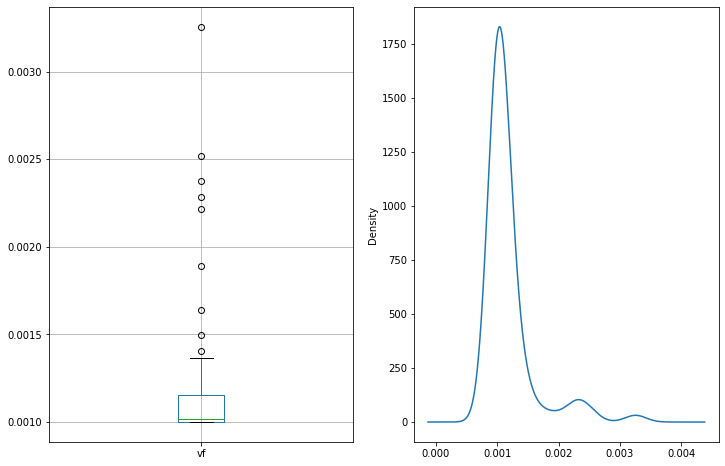

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.boxplot('vf')
plt.subplot(1,2,2)
df['vf'].plot.kde()
plt.show()

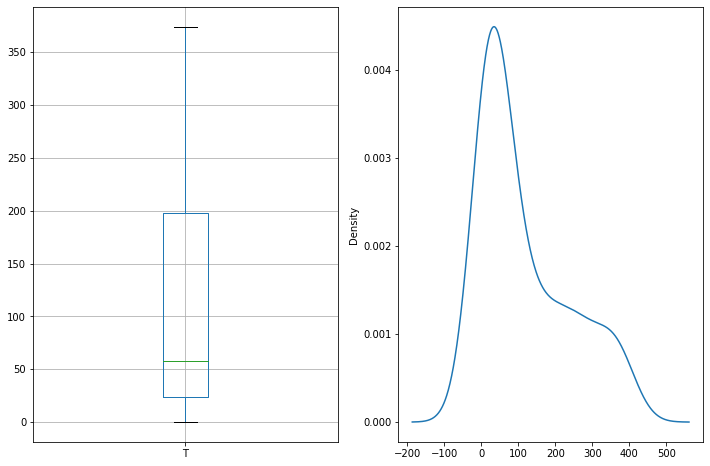

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.boxplot('T')
plt.subplot(1,2,2)
df['T'].plot.kde()
plt.show()

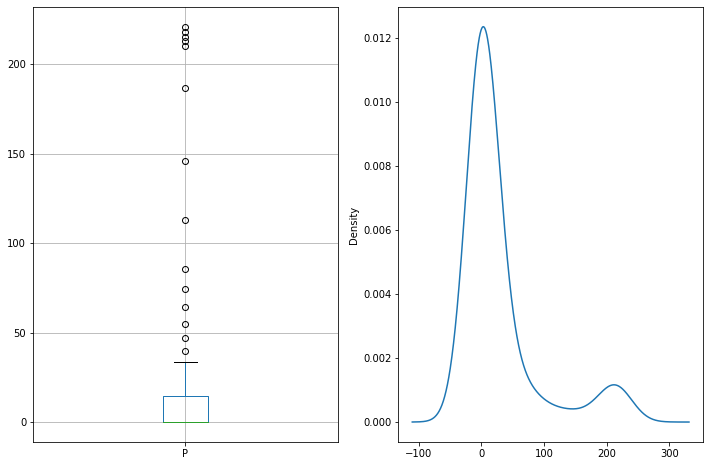

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.boxplot('P')
plt.subplot(1,2,2)
df['P'].plot.kde()
plt.show()

In [8]:
df['T']

0       0.010
1       4.000
2       5.000
3       6.000
4       8.000
       ...   
69    370.000
70    371.000
71    372.000
72    373.000
73    374.136
Name: T, Length: 74, dtype: float64

In [9]:
df_corr = df[['T', 'P', 'vf', 'vfg', 'vg', 'uf', 'ufg','ug','hf','hfg','hg','sf','sfg','sg']].corr()
df_corr

,T,P,vf,vfg,vg,uf,ufg,ug,hf,hfg,hg,sf,sfg,sg
T,1.000000,0.852784,0.801486,-0.603963,-0.603957,0.994322,-0.958220,0.020021,0.992748,-0.940351,0.059425,0.998287,-0.994816,-0.989180
P,0.852784,1.000000,0.955799,-0.331741,-0.331733,0.899725,-0.960822,-0.491748,0.905204,-0.973680,-0.459738,0.846579,-0.829919,-0.811787
vf,0.801486,0.955799,1.000000,-0.326567,-0.326559,0.859855,-0.933951,-0.555365,0.866697,-0.950188,-0.519434,0.807636,-0.794834,-0.780547
vfg,-0.603963,-0.331741,-0.326567,1.000000,1.000000,-0.570924,0.491536,-0.330472,-0.566078,0.462451,-0.359908,-0.631394,0.661850,0.690067
vg,-0.603957,-0.331733,-0.326559,1.000000,1.000000,-0.570918,0.491529,-0.330478,-0.566071,0.462443,-0.359913,-0.631389,0.661845,0.690062
uf,0.994322,0.899725,0.859855,-0.570924,-0.570918,1.000000,-0.983070,-0.085234,0.999903,-0.970969,-0.045538,0.993485,-0.988066,-0.980544
ufg,-0.958220,-0.960822,-0.933951,0.491536,0.491529,-0.983070,1.000000,0.266355,-0.985504,0.998355,0.227764,-0.957613,0.948324,0.937116
ug,0.020021,-0.491748,-0.555365,-0.330472,-0.330478,-0.085234,0.266355,1.000000,-0.098976,0.321070,0.998978,0.018923,-0.040930,-0.062307
hf,0.992748,0.905204,0.866697,-0.566078,-0.566071,0.999903,-0.985504,-0.098976,1.000000,-0.974171,-0.059285,0.992009,-0.986334,-0.978566
hfg,-0.940351,-0.973680,-0.950188,0.462451,0.462443,-0.970969,0.998355,0.321070,-0.974171,1.000000,0.283168,-0.939642,0.929107,0.916728


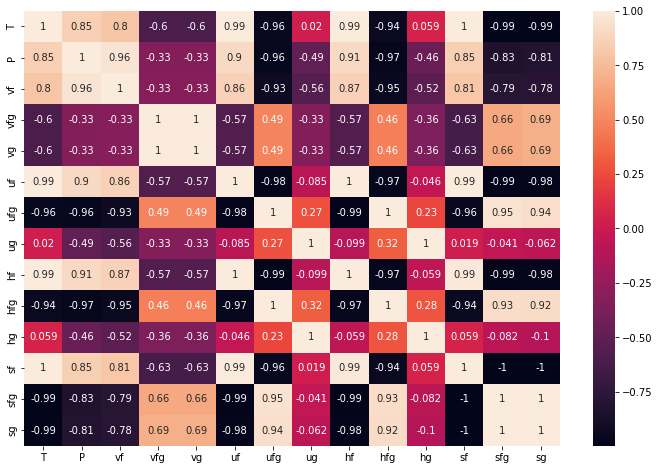

In [88]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_corr, annot=True)
plt.show()

In [89]:
#features = df.drop('vf', axis =1)
features = df[['T','P']]
target = df[['vf']]

In [90]:
features.columns

Index(['T', 'P'], dtype='object')

In [91]:
features.sample(5)

,T,P
73,374.136,220.890000
37,60.000,0.199010
71,372.000,215.280450
34,45.000,0.095722
42,85.000,0.577491


In [92]:
target.columns

Index(['vf'], dtype='object')

In [93]:
target.sample(5)

,vf
14,0.001002
20,0.001003
8,0.001001
57,0.001190
46,0.001052


In [94]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                                columns=features.columns,
                                index=features.index)
scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
T,74.0,-7.801567e-17,1.006826,-0.977342,-0.781249,-0.492256,0.689028,2.179436
P,74.0,-3.600723e-17,1.006826,-0.461280,-0.460909,-0.458434,-0.216952,3.192754


In [100]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
scaled_features = pd.DataFrame(minmaxScaler.fit_transform(features), 
                                columns=features.columns,
                                index=features.index)
scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
T,74.0,0.309601,0.318941,0.0,0.062118,0.153665,0.527870,1.0
P,74.0,0.126238,0.275538,0.0,0.000101,0.000779,0.066865,1.0


In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=1)

In [110]:
from sklearn.neural_network import MLPRegressor
m = MLPRegressor(hidden_layer_sizes={50,50,50}, activation='relu', solver='adam', verbose='True', max_iter= 20000, tol=1e-5)
m.fit(x_train, y_train)

Iteration 1, loss = 0.18649441
Iteration 2, loss = 0.17855195
Iteration 3, loss = 0.17080716
Iteration 4, loss = 0.16325354
Iteration 5, loss = 0.15590362
Iteration 6, loss = 0.14876226
Iteration 7, loss = 0.14182645
Iteration 8, loss = 0.13509842
Iteration 9, loss = 0.12857413
Iteration 10, loss = 0.12225001
Iteration 11, loss = 0.11611271
Iteration 12, loss = 0.11017636
Iteration 13, loss = 0.10444072
Iteration 14, loss = 0.09890445
Iteration 15, loss = 0.09357034
Iteration 16, loss = 0.08843963
Iteration 17, loss = 0.08351186
Iteration 18, loss = 0.07877497
Iteration 19, loss = 0.07423345
Iteration 20, loss = 0.06988877
Iteration 21, loss = 0.06573099
Iteration 22, loss = 0.06176290
Iteration 23, loss = 0.05798230
Iteration 24, loss = 0.05438191
Iteration 25, loss = 0.05095972
Iteration 26, loss = 0.04771218
Iteration 27, loss = 0.04463085
Iteration 28, loss = 0.04171565
Iteration 29, loss = 0.03896707
Iteration 30, loss = 0.03637698
Iteration 31, loss = 0.03394274
Iteration 32, los

C:\Users\55839\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes={50}, max_iter=20000, tol=1e-05, verbose='True')

In [111]:
score = m.score(x_train, y_train)
print("Training Score: ", score)

Training Score:  -8050.820458409628


In [112]:
from sklearn.metrics import r2_score
y_pred = m.predict(x_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score: ", r_score)

Testing Score:  -16225.02770673575


      y_test    y_pred
6   0.001026 -0.002019
0   0.001003  0.032865
5   0.001005  0.028053
8   0.001010  0.018444
4   0.001141 -0.059509
10  0.001040 -0.015471
12  0.001000  0.046306
14  0.001005  0.027366
11  0.001060 -0.030100
1   0.001156 -0.062447


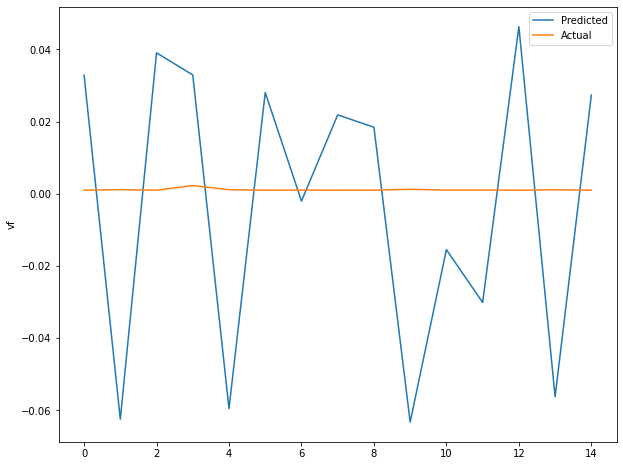

In [113]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
print(pred_results.sample(10))
plt.figure(figsize=(10, 8))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel("vf")
plt.legend()
plt.show()